In [1]:
from sklearn import svm, datasets
import pandas as pd
from sklearn.feature_selection import chi2

In [2]:
bbc = pd.read_csv(r'bbc-text.csv')
bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
bbc.shape
(r'C:\Users\80071\Downloads\bbc-text.csv')

(2225, 2)

In [4]:
print(len(pd.notnull(bbc['text'])))

2225


In [5]:
bbc.describe().T

,count,unique,top,freq
category,2225,5,sport,511
text,2225,2126,microsoft makes anti-piracy move microsoft say...,2


In [6]:
pd.DataFrame(bbc['category'].unique())

,0
0,tech
1,business
2,sport
3,entertainment
4,politics


In [7]:
print(bbc['category'])

0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, Length: 2225, dtype: object


In [8]:
print(bbc['category'].factorize())

(array([0, 1, 2, ..., 3, 4, 2], dtype=int64), Index(['tech', 'business', 'sport', 'entertainment', 'politics'], dtype='object'))


In [9]:
print(bbc['category'])

0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, Length: 2225, dtype: object


In [10]:
print((bbc['category'].factorize()[0]))
bbc['category_id'] = bbc['category'].factorize()[0]

[0 1 2 ... 3 4 2]


In [12]:
print(bbc['category_id'])

0       0
1       1
2       2
3       2
4       3
       ..
2220    1
2221    4
2222    3
2223    4
2224    2
Name: category_id, Length: 2225, dtype: int64


In [13]:
bbc.head(10)

,category,text,category_id
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3
5,politics,howard hits back at mongrel jibe michael howar...,4
6,politics,blair prepares to name poll date tony blair is...,4
7,sport,henman hopes ended in dubai third seed tim hen...,2
8,sport,wilkinson fit to face edinburgh england captai...,2
9,entertainment,last star wars not for children the sixth an...,3


In [14]:
category_id_df = bbc[['category','category_id']].drop_duplicates()

In [15]:
category_id_df.shape

(5, 2)

In [16]:
category_id_df.values

array([['tech', 0],
       ['business', 1],
       ['sport', 2],
       ['entertainment', 3],
       ['politics', 4]], dtype=object)

In [17]:
id_to_category = dict(category_id_df[['category_id','category']].values)
print(id_to_category)

{0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}


In [18]:
#Dictionary for future use 
category_to_id = dict(category_id_df.values)
#id_to_category = dict(category_id_df[['category_id','category']].values)
bbc.head()

,category,text,category_id
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


Text(0.5, 0, 'Number of occurences')

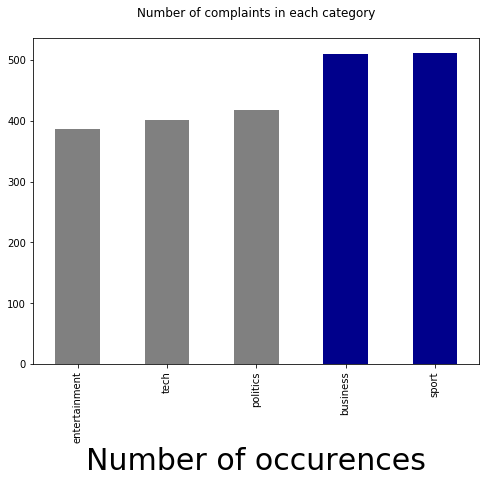

In [20]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize  = (8,6))
colors = ['grey','grey','grey','darkblue','darkblue']


bbc.groupby('category').text.count().sort_values().plot.bar(ylim=0,color=colors,title='Number of complaints in each category\n')
plt.xlabel('Number of occurences',fontsize = 30)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


In [22]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1,2),stop_words='english')
features = tfidf.fit_transform(bbc.text).toarray()
labels = bbc.category_id
print('Each of %d bbc text is represented by %d features with unigram and bigram'%(features.shape))

Each of 2225 bbc text is represented by 14415 features with unigram and bigram


In [23]:
import numpy as np
N = 3
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(category))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> business:
  * Most Correlated Unigrams are: oil, growth, shares
  * Most Correlated Bigrams are: analysts said, economic growth, stock market

==> entertainment:
  * Most Correlated Unigrams are: singer, actor, film
  * Most Correlated Bigrams are: los angeles, film festival, box office

==> politics:
  * Most Correlated Unigrams are: blair, election, labour
  * Most Correlated Bigrams are: prime minister, tony blair, mr blair

==> sport:
  * Most Correlated Unigrams are: coach, match, cup
  * Most Correlated Bigrams are: grand slam, australian open, champions league

==> tech:
  * Most Correlated Unigrams are: technology, software, users
  * Most Correlated Bigrams are: anti virus, mobile phones, mobile phone


In [24]:
X = bbc['text']
y = bbc['category']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [28]:
print('size of X_test is :',len(X_test))
print('size of X_train is :',len(X_train))
print('size of y_train is :',len(y_train))
print('size of y_test is :',len(y_test))


size of X_test is : 557
size of X_train is : 1668
size of y_train is : 1668
size of y_test is : 557


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [31]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [32]:
len(models)

4

In [33]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    print('model name is ',model_name)
    print('passed features are',features)
    print('passed label is',labels)
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    print('Accuracy is ',accuracies)
    for fold_idx, accuracy in enumerate(accuracies):
        print('fold_idx is ',fold_idx,'and model_name is',model_name,'and hence the accuracy is ',accuracy)
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

model name is  RandomForestClassifier
passed features are [[0.         0.02445787 0.         ... 0.         0.         0.        ]
 [0.         0.03211795 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03857387 0.         ... 0.         0.         0.        ]
 [0.         0.02765229 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
passed label is 0       0
1       1
2       2
3       2
4       3
       ..
2220    1
2221    4
2222    3
2223    4
2224    2
Name: category_id, Length: 2225, dtype: int64
Accuracy is  [0.86607143 0.89438202 0.90315315 0.8536036  0.87387387]
fold_idx is  0 and model_name is RandomForestClassifier and hence the accuracy is  0.8660714285714286
fold_idx is  1 and model_name is RandomForestClassifier and hence the accuracy is  0.8943820224719101
fold_idx is  2 and model_name is RandomForestClassif

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

Accuracy is  [0.97544643 0.98202247 0.98648649 0.97072072 0.98423423]
fold_idx is  0 and model_name is LogisticRegression and hence the accuracy is  0.9754464285714286
fold_idx is  1 and model_name is LogisticRegression and hence the accuracy is  0.9820224719101124
fold_idx is  2 and model_name is LogisticRegression and hence the accuracy is  0.9864864864864865
fold_idx is  3 and model_name is LogisticRegression and hence the accuracy is  0.9707207207207207
fold_idx is  4 and model_name is LogisticRegression and hence the accuracy is  0.9842342342342343


In [34]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.986967,0.003336
LogisticRegression,0.979782,0.006533
MultinomialNB,0.970783,0.010692
RandomForestClassifier,0.878217,0.020343


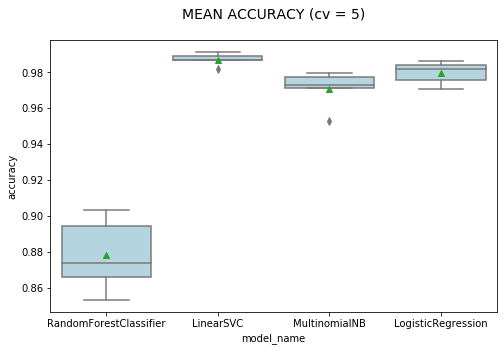

In [36]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',data=cv_df,color='lightblue',showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [37]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,labels,bbc.index, test_size=0.25, random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,target_names= bbc['category'].unique()))

				CLASSIFICATIION METRICS

               precision    recall  f1-score   support

         tech       0.98      0.98      0.98       100
     business       0.98      0.99      0.99       137
        sport       0.99      0.99      0.99       129
entertainment       0.99      0.98      0.98        89
     politics       0.99      0.98      0.99       102

    micro avg       0.99      0.99      0.99       557
    macro avg       0.99      0.98      0.99       557
 weighted avg       0.99      0.99      0.99       557



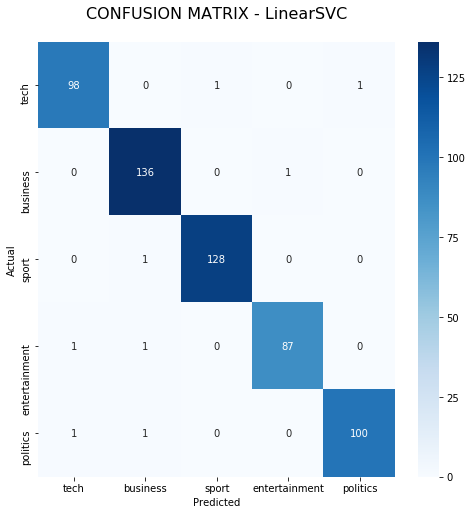

In [40]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',xticklabels=category_id_df.category.values,yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [51]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 1:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],id_to_category[predicted],conf_mat[actual, predicted]))
            display(bbc.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category','text']])
            print('Hello')


'entertainment' predicted as 'tech' : 1 examples.


,category,text
2058,entertainment,new media battle for bafta awards the bbc lead...


Hello
'politics' predicted as 'tech' : 1 examples.


,category,text
158,politics,uk firms embracing e-commerce uk firms are e...


Hello
'sport' predicted as 'business' : 1 examples.


,category,text
1565,sport,ferdinand casts doubt over glazer rio ferdinan...


Hello
'entertainment' predicted as 'business' : 1 examples.


,category,text
37,entertainment,row threatens hendrix museum plan proposals to...


Hello
'politics' predicted as 'business' : 1 examples.


,category,text
2072,politics,hatfield executives go on trial engineering fi...


Hello
'tech' predicted as 'sport' : 1 examples.


,category,text
585,tech,football manager scores big time for the past ...


Hello
'business' predicted as 'entertainment' : 1 examples.


,category,text
557,business,us bank boss hails genius smith us federal r...


Hello
'tech' predicted as 'politics' : 1 examples.


,category,text
547,tech,ink helps drive democracy in asia the kyrgyz r...


Hello


In [52]:
model.fit(features, labels)

N = 4
for category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n==> '{}':".format(category))
    print("  * Top unigrams: %s" %(', '.join(unigrams)))
    print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'business':
  * Top unigrams: bank, firm, shares, economic
  * Top bigrams: chief executive, mr glazer, stock market, analysts said

==> 'entertainment':
  * Top unigrams: film, singer, tv, music
  * Top bigrams: box office, los angeles, new york, ticket sales

==> 'politics':
  * Top unigrams: party, labour, secretary, government
  * Top bigrams: mr blair, mr brown, human rights, tony blair

==> 'sport':
  * Top unigrams: match, club, cup, coach
  * Top bigrams: year old, world number, australian open, subs used

==> 'tech':
  * Top unigrams: computer, online, software, technology
  * Top bigrams: said mr, news website, half life, bbc news


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2), stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)


In [68]:
new_complaint = """ Anushaka Sharma is actress  based in Uk and doing bussiness with Jack Maa in China  ."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['entertainment']
